In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import HistGradientBoostingClassifier

# Data Set
The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique.

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

In [5]:
filepath="/magic04.data"

In [7]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("/magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [8]:
df["class"]=( df["class"]=="g").astype(int)


In [9]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

This is an Example of supervised Learning .

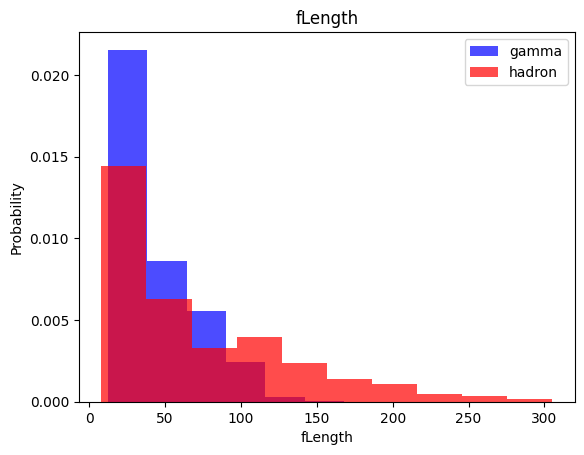

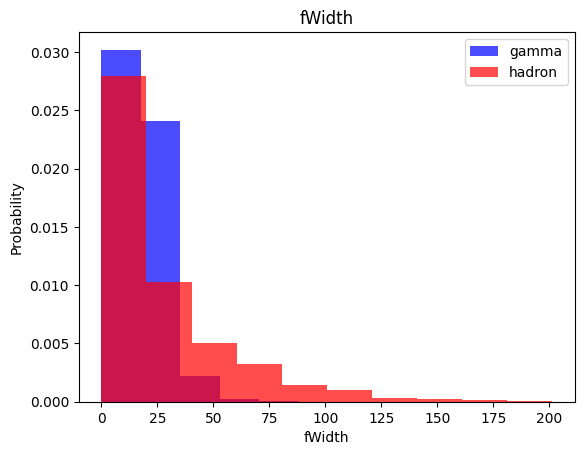

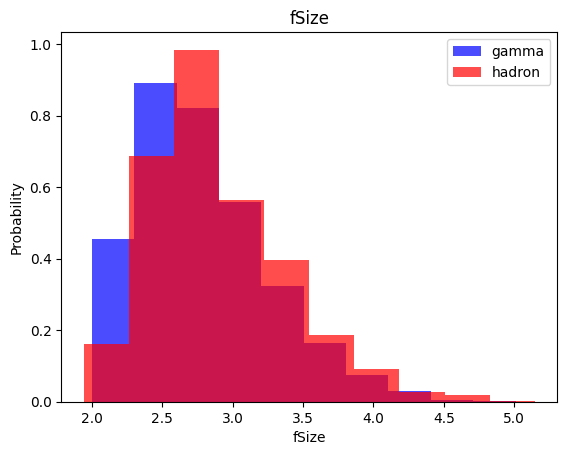

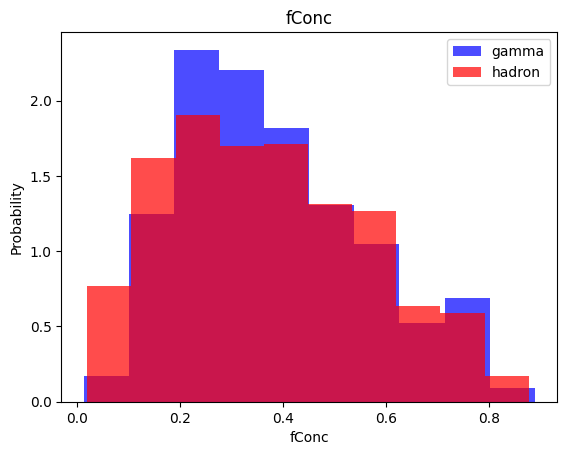

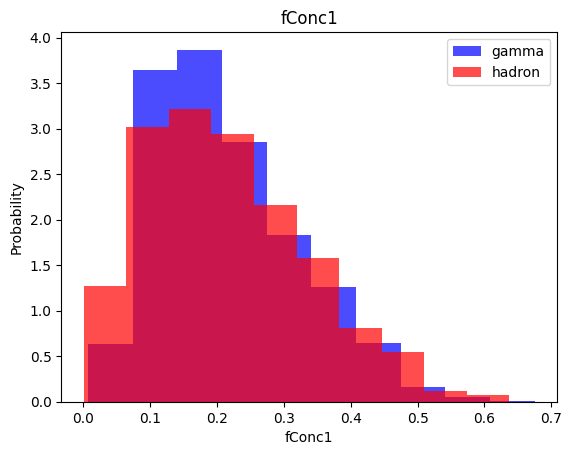

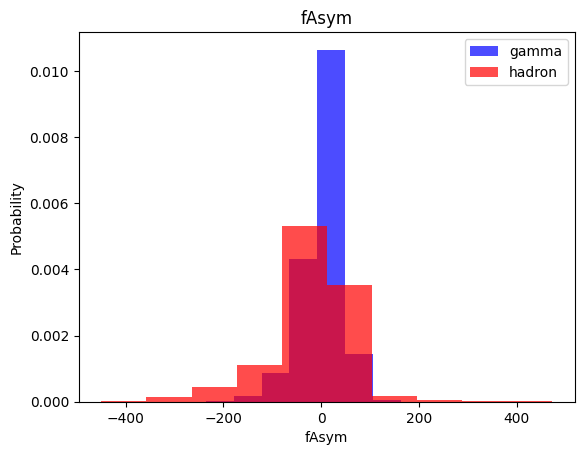

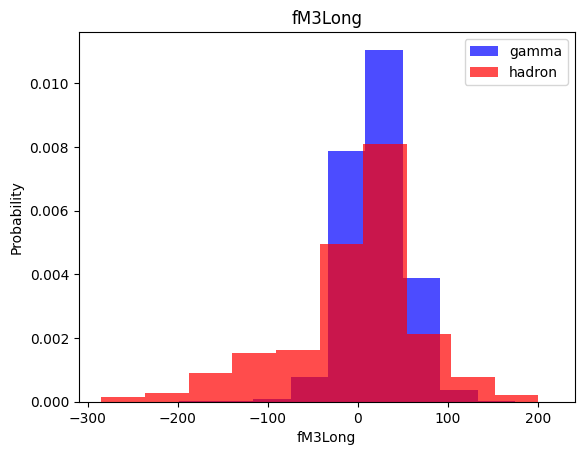

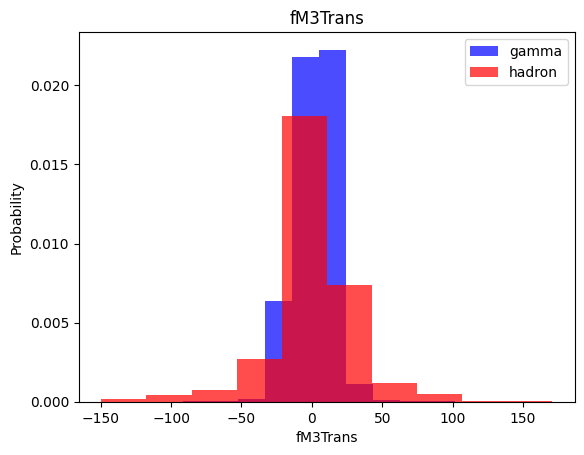

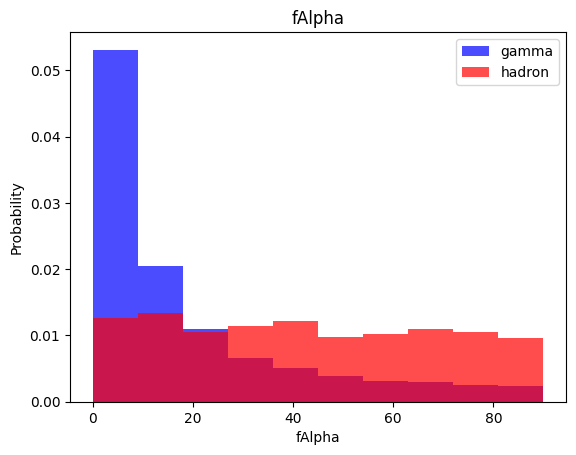

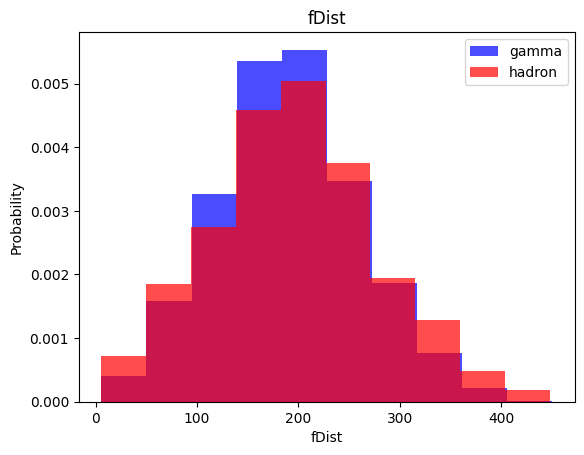

In [10]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color="blue",label="gamma",alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color="red",label="hadron",alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, Validate ,Test Datasets

In [40]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])


In [46]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Scale features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Oversample if needed
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

In [47]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

## HistGradientBoostingClassifier

In [43]:
hgb_model = HistGradientBoostingClassifier()
hgb_model.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [42]:
from sklearn.metrics import classification_report

In [36]:
y_pred = hgb_model.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65       248
           1       0.97      0.95      0.96      2468

    accuracy                           0.93      2716
   macro avg       0.78      0.83      0.80      2716
weighted avg       0.94      0.93      0.93      2716



## Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

In [48]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [49]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.41      0.30       228
           1       0.94      0.88      0.91      2488

    accuracy                           0.84      2716
   macro avg       0.59      0.65      0.61      2716
weighted avg       0.88      0.84      0.86      2716



# K-Nearest Neighbor

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
y_pred = knn_model.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.60      0.47       228
           1       0.96      0.91      0.94      2488

    accuracy                           0.89      2716
   macro avg       0.67      0.75      0.70      2716
weighted avg       0.91      0.89      0.90      2716



In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [56]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.69      0.37       228
           1       0.97      0.81      0.88      2488

    accuracy                           0.80      2716
   macro avg       0.61      0.75      0.63      2716
weighted avg       0.91      0.80      0.84      2716



## Support Vector Machines

In [57]:
from sklearn.svm import SVC


In [58]:
svm_model=SVC()
svm_model=svm_model.fit(X_train,y_train)

In [59]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.71      0.52       228
           1       0.97      0.91      0.94      2488

    accuracy                           0.89      2716
   macro avg       0.69      0.81      0.73      2716
weighted avg       0.92      0.89      0.90      2716



## Neural Networks

In [60]:
import tensorflow as tf

In [63]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [64]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


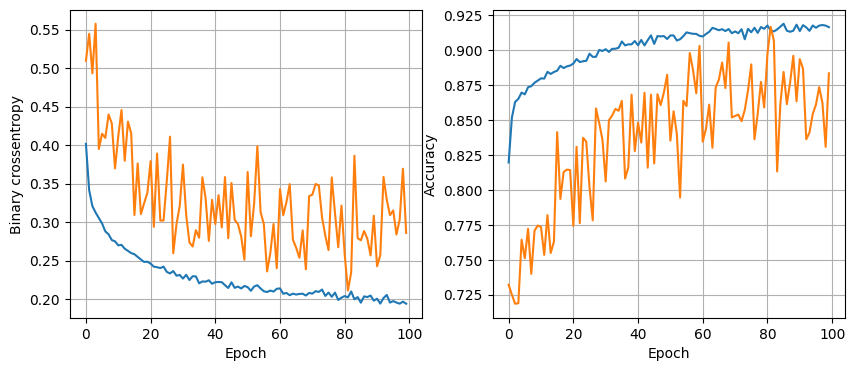

85/85 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.9083
16 nodes, dropout 0, lr 0.01, batch size 64


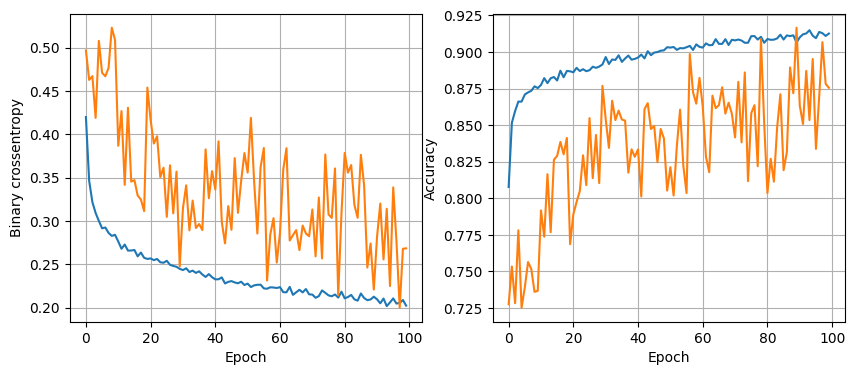

85/85 [==============================] - 0s 2ms/step - loss: 0.2782 - accuracy: 0.9072
16 nodes, dropout 0, lr 0.01, batch size 128


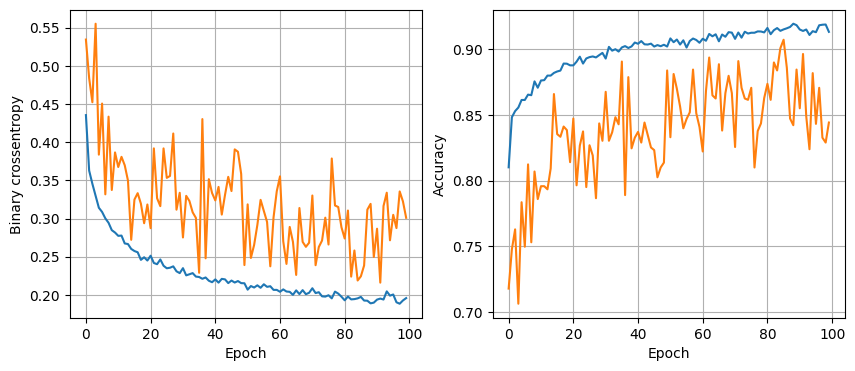

85/85 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.9080
16 nodes, dropout 0, lr 0.005, batch size 32


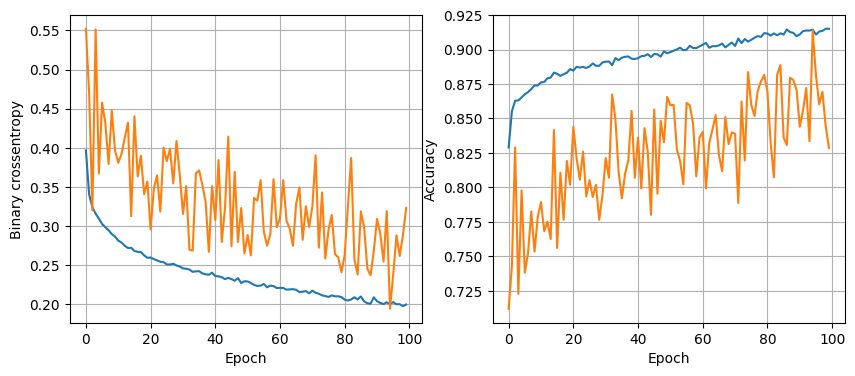

85/85 [==============================] - 0s 3ms/step - loss: 0.3467 - accuracy: 0.9194
16 nodes, dropout 0, lr 0.005, batch size 64


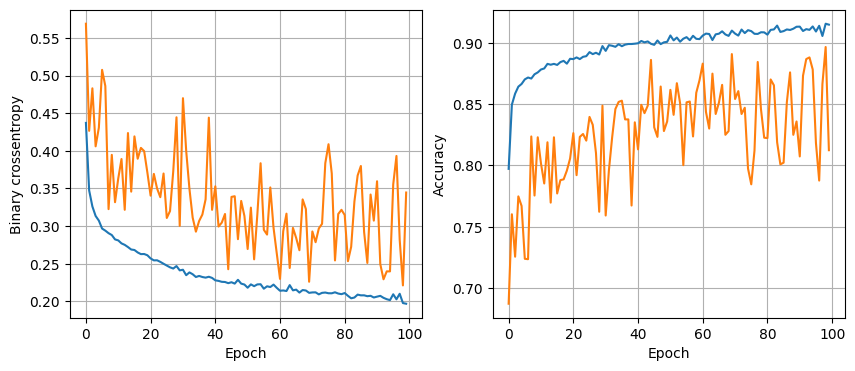

85/85 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.9138
16 nodes, dropout 0, lr 0.005, batch size 128


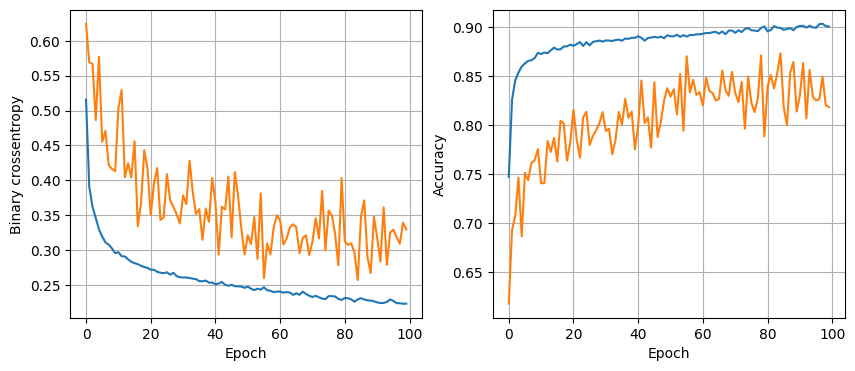

85/85 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 0.9098
16 nodes, dropout 0, lr 0.001, batch size 32


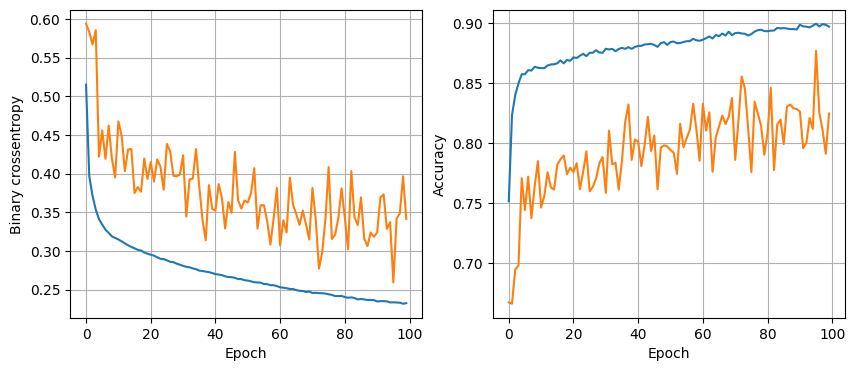

85/85 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.9080
16 nodes, dropout 0, lr 0.001, batch size 64


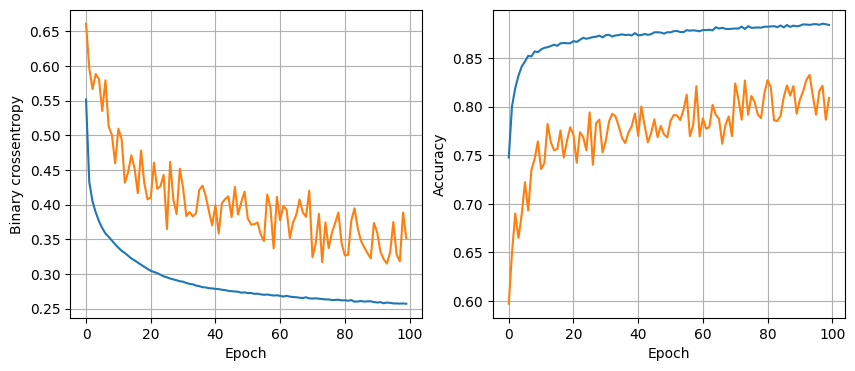

85/85 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.9080
16 nodes, dropout 0, lr 0.001, batch size 128


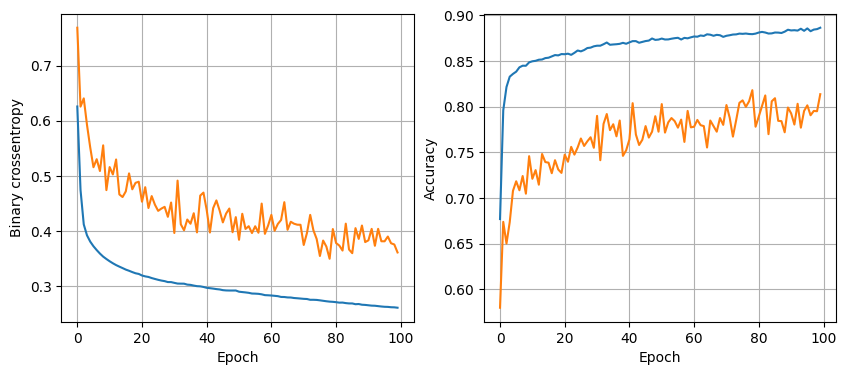

85/85 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.9131
16 nodes, dropout 0.2, lr 0.01, batch size 32


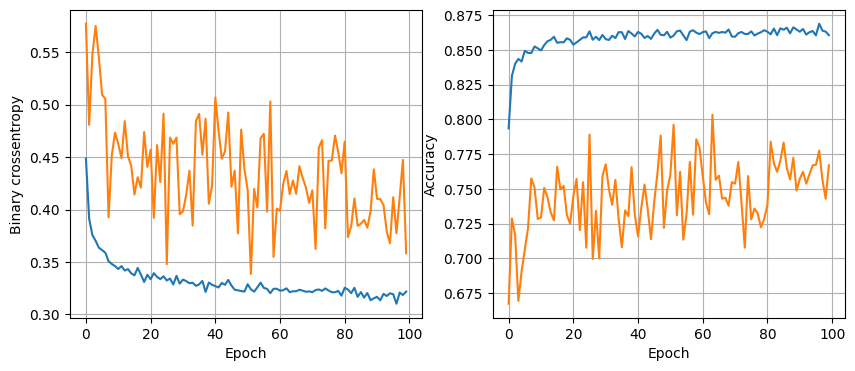

85/85 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.9245
16 nodes, dropout 0.2, lr 0.01, batch size 64


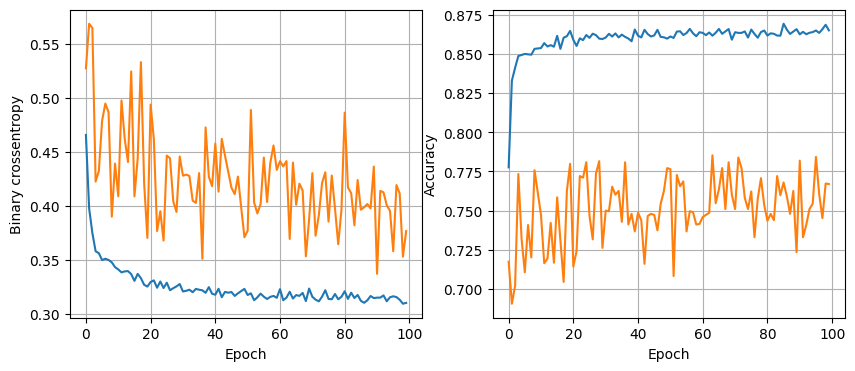

85/85 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.9282
16 nodes, dropout 0.2, lr 0.01, batch size 128


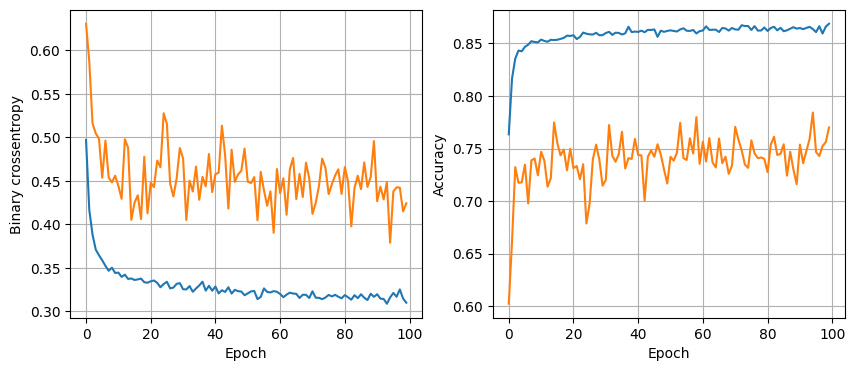

85/85 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9230
16 nodes, dropout 0.2, lr 0.005, batch size 32


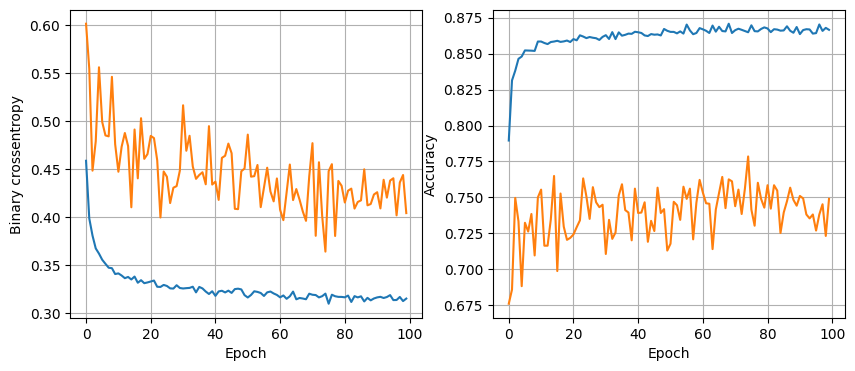

85/85 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.9304
16 nodes, dropout 0.2, lr 0.005, batch size 64


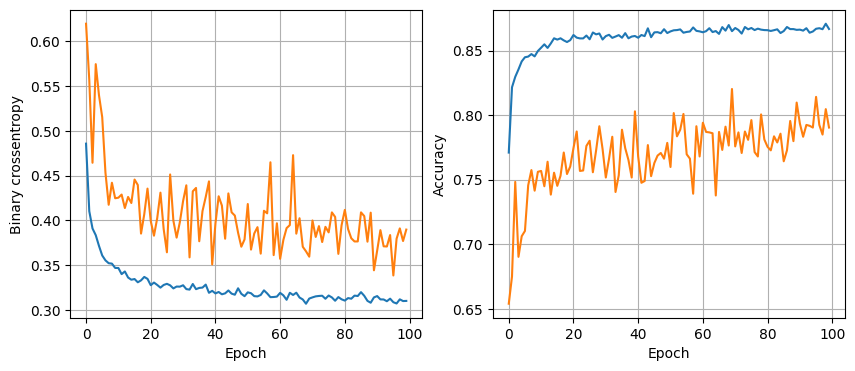

85/85 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.9227
16 nodes, dropout 0.2, lr 0.005, batch size 128


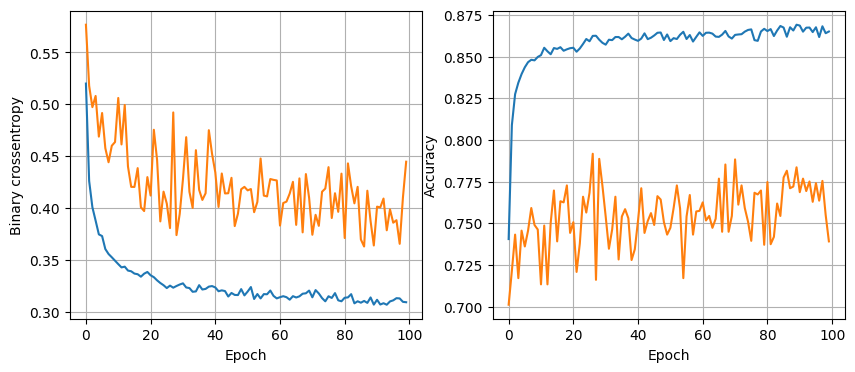

85/85 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9337
16 nodes, dropout 0.2, lr 0.001, batch size 32


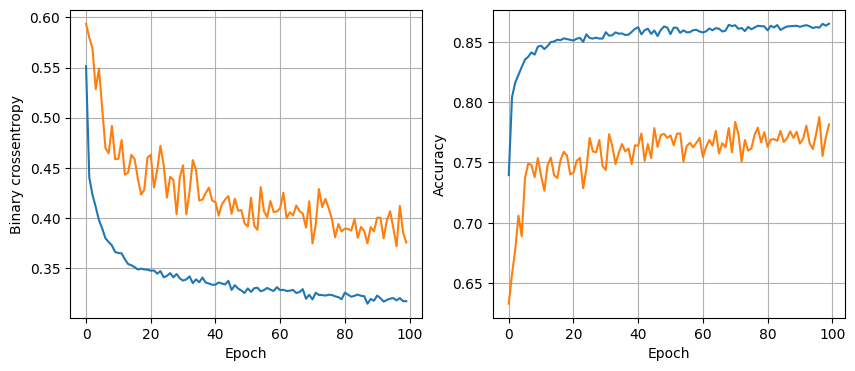

85/85 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9230
16 nodes, dropout 0.2, lr 0.001, batch size 64


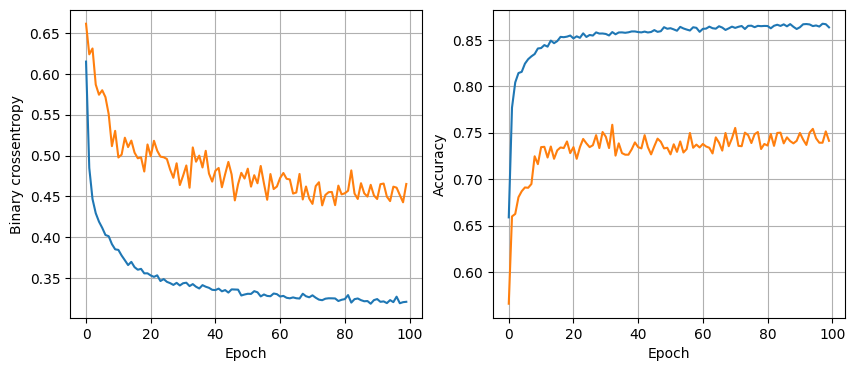

85/85 [==============================] - 0s 2ms/step - loss: 0.2278 - accuracy: 0.9308
16 nodes, dropout 0.2, lr 0.001, batch size 128


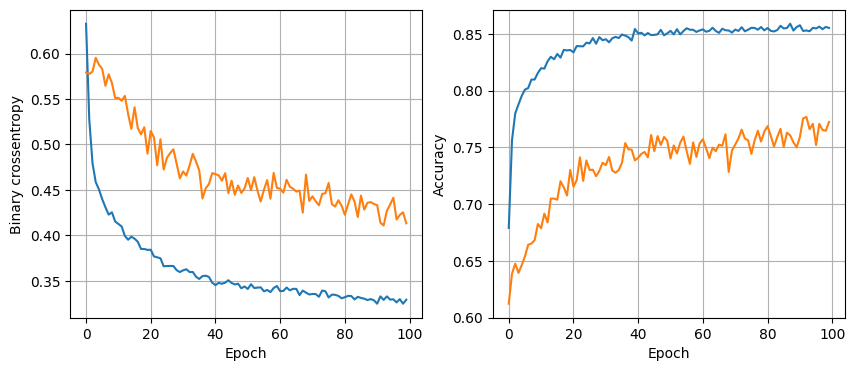

85/85 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.9168
32 nodes, dropout 0, lr 0.01, batch size 32


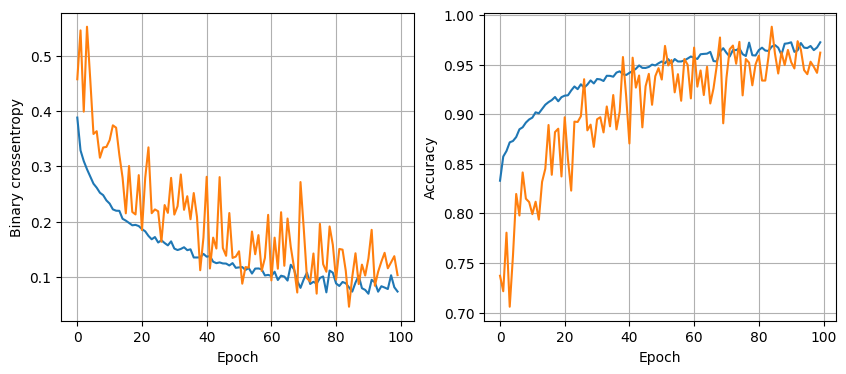

85/85 [==============================] - 0s 4ms/step - loss: 0.7087 - accuracy: 0.9216
32 nodes, dropout 0, lr 0.01, batch size 64


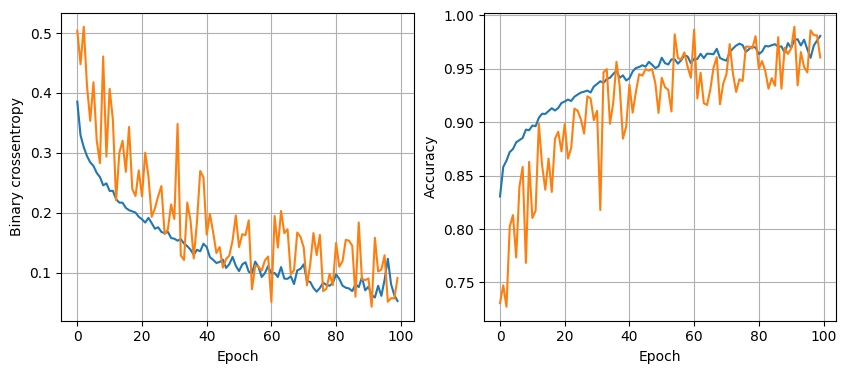

85/85 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.9212
32 nodes, dropout 0, lr 0.01, batch size 128


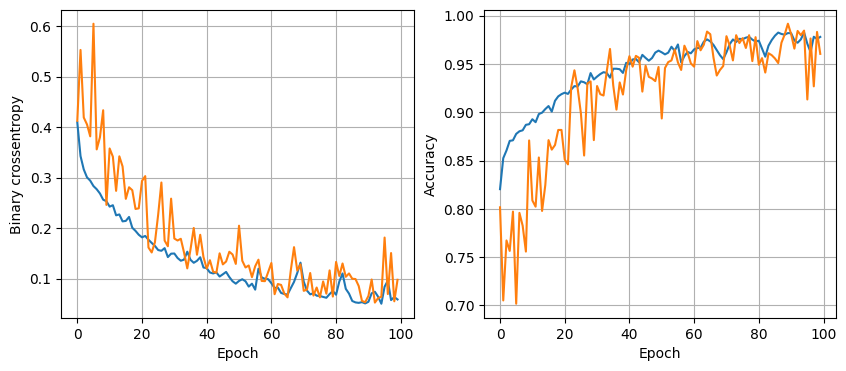

85/85 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.9238
32 nodes, dropout 0, lr 0.005, batch size 32


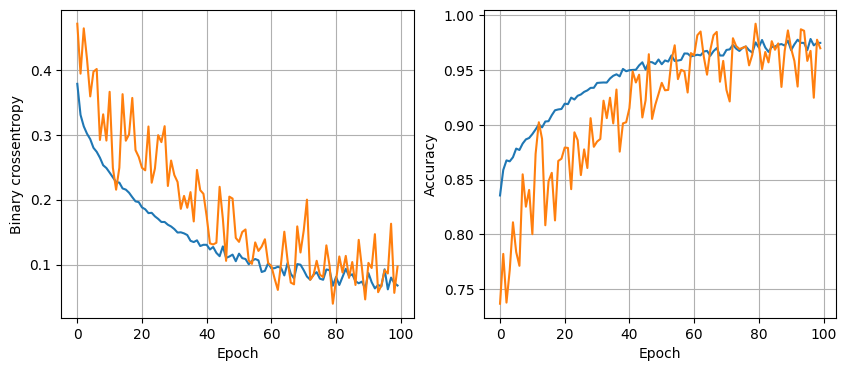

85/85 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.9197
32 nodes, dropout 0, lr 0.005, batch size 64


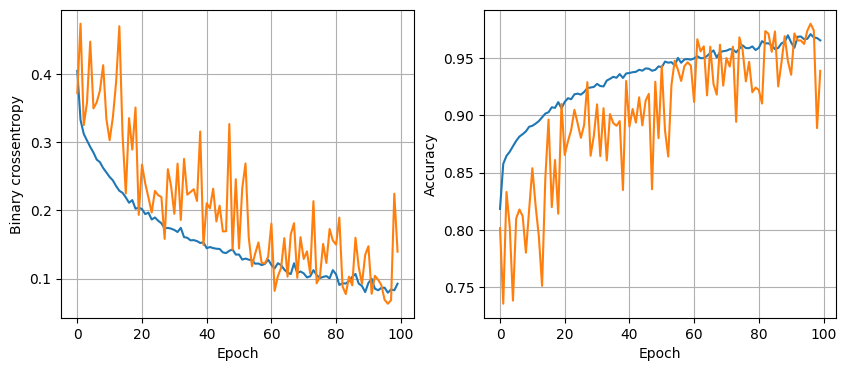

85/85 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.9168
32 nodes, dropout 0, lr 0.005, batch size 128


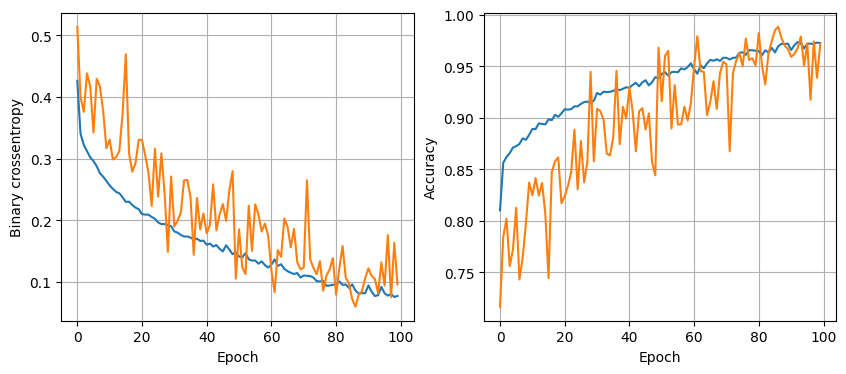

85/85 [==============================] - 0s 3ms/step - loss: 0.4853 - accuracy: 0.9109
32 nodes, dropout 0, lr 0.001, batch size 32


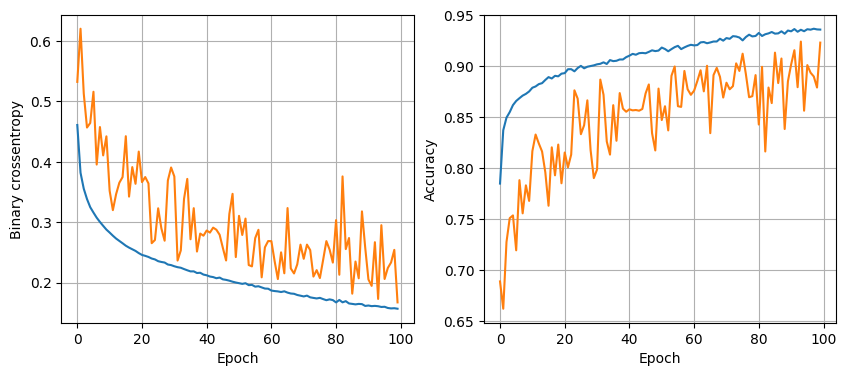

85/85 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 0.9080
32 nodes, dropout 0, lr 0.001, batch size 64


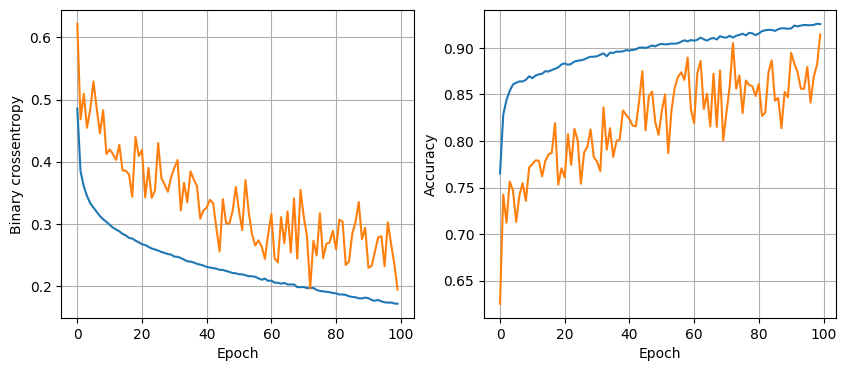

85/85 [==============================] - 0s 3ms/step - loss: 0.2658 - accuracy: 0.9068
32 nodes, dropout 0, lr 0.001, batch size 128


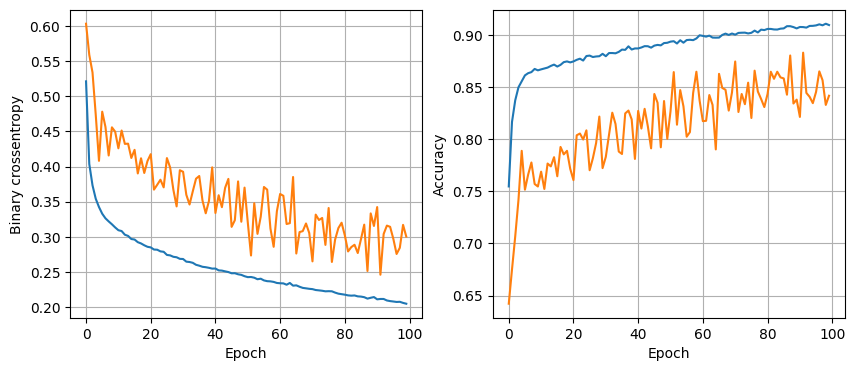

85/85 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9219
32 nodes, dropout 0.2, lr 0.01, batch size 32


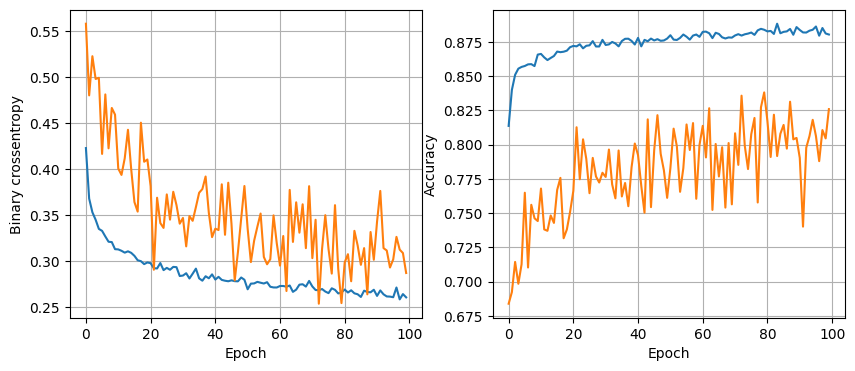

85/85 [==============================] - 0s 4ms/step - loss: 0.2661 - accuracy: 0.9219
32 nodes, dropout 0.2, lr 0.01, batch size 64


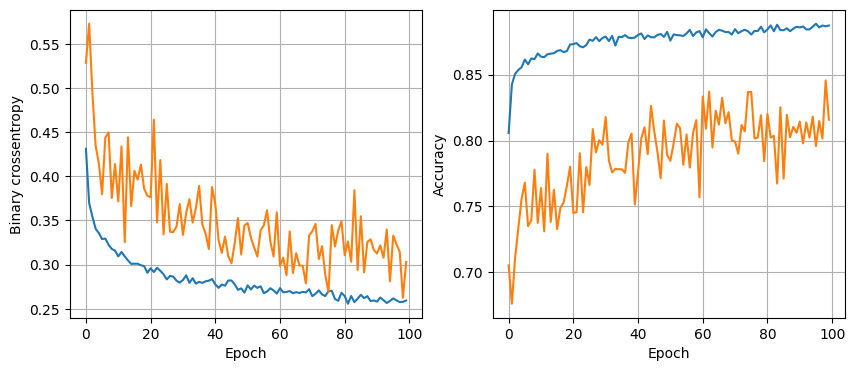

85/85 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9286
32 nodes, dropout 0.2, lr 0.01, batch size 128


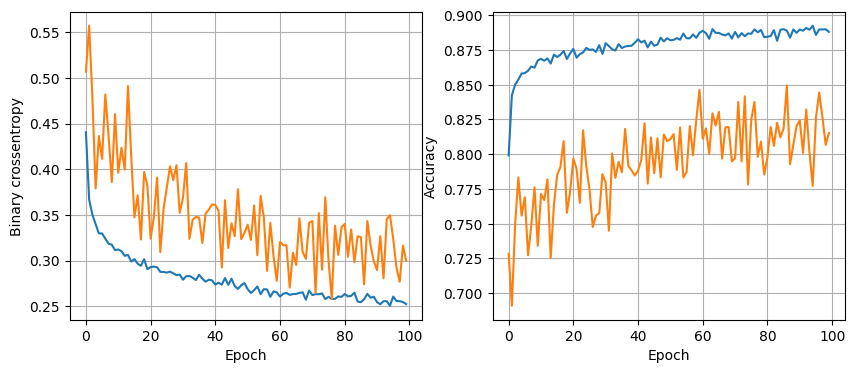

85/85 [==============================] - 0s 4ms/step - loss: 0.2285 - accuracy: 0.9293
32 nodes, dropout 0.2, lr 0.005, batch size 32


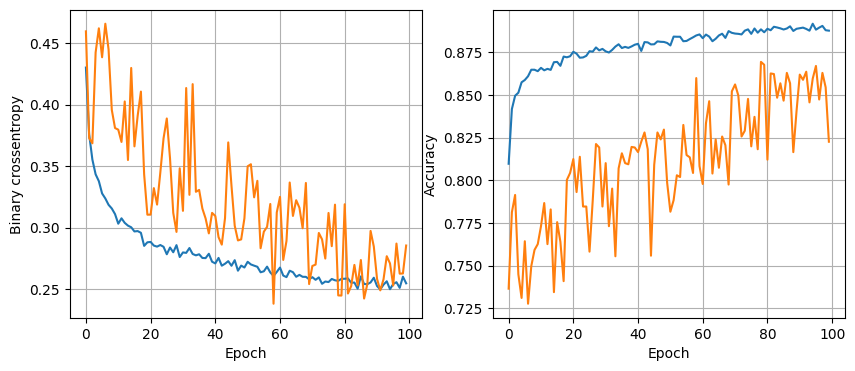

85/85 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9297
32 nodes, dropout 0.2, lr 0.005, batch size 64


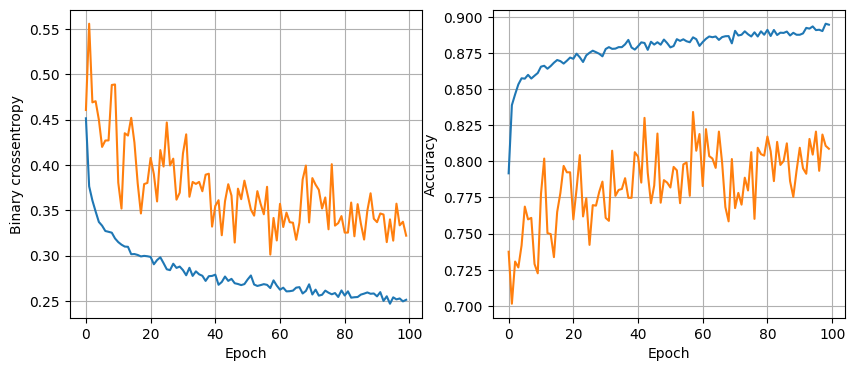

85/85 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9300
32 nodes, dropout 0.2, lr 0.005, batch size 128


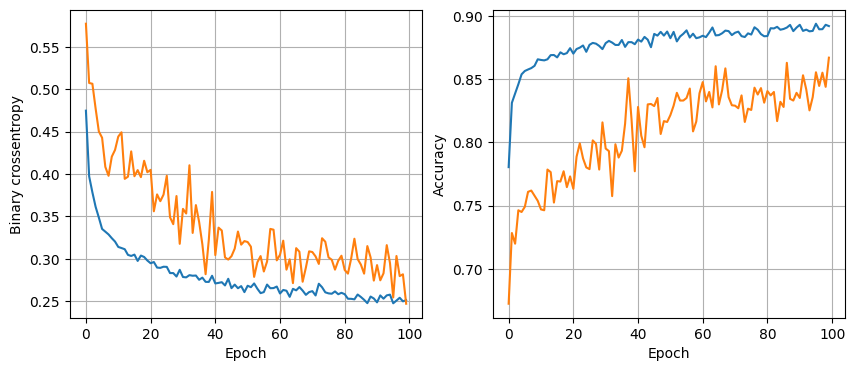

85/85 [==============================] - 0s 3ms/step - loss: 0.2469 - accuracy: 0.9161
32 nodes, dropout 0.2, lr 0.001, batch size 32


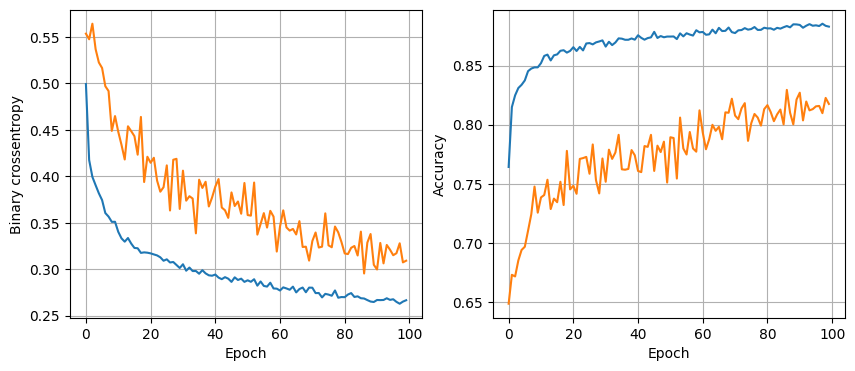

85/85 [==============================] - 0s 3ms/step - loss: 0.2336 - accuracy: 0.9194
32 nodes, dropout 0.2, lr 0.001, batch size 64


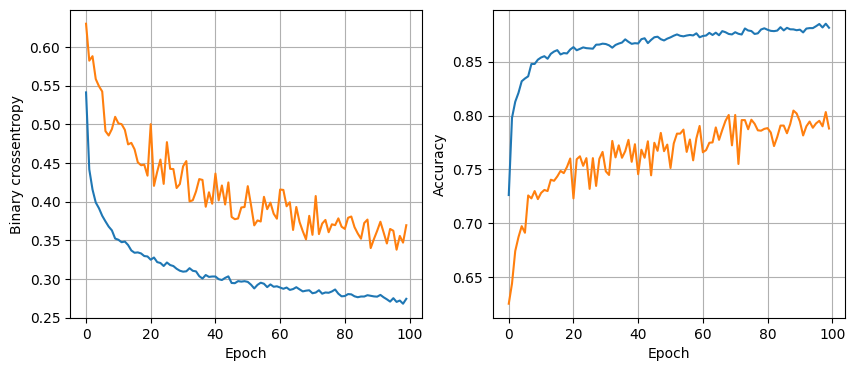

85/85 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9341
32 nodes, dropout 0.2, lr 0.001, batch size 128


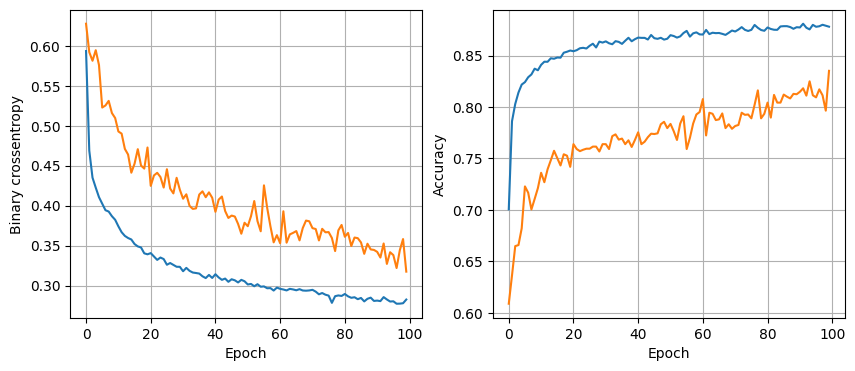

85/85 [==============================] - 0s 3ms/step - loss: 0.2406 - accuracy: 0.9142
64 nodes, dropout 0, lr 0.01, batch size 32


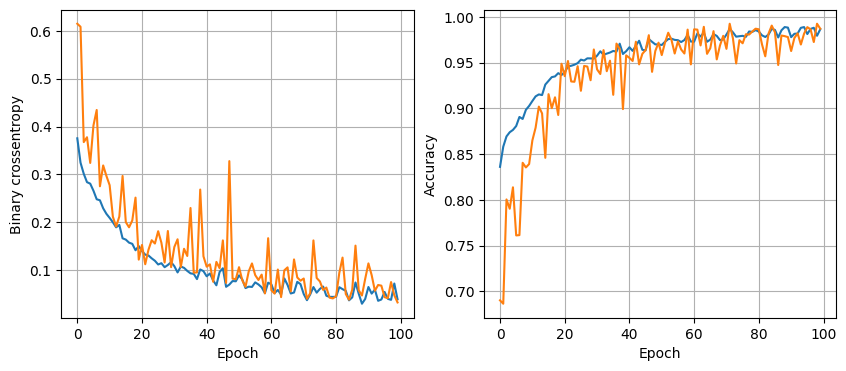

85/85 [==============================] - 0s 3ms/step - loss: 0.9263 - accuracy: 0.9227
64 nodes, dropout 0, lr 0.01, batch size 64


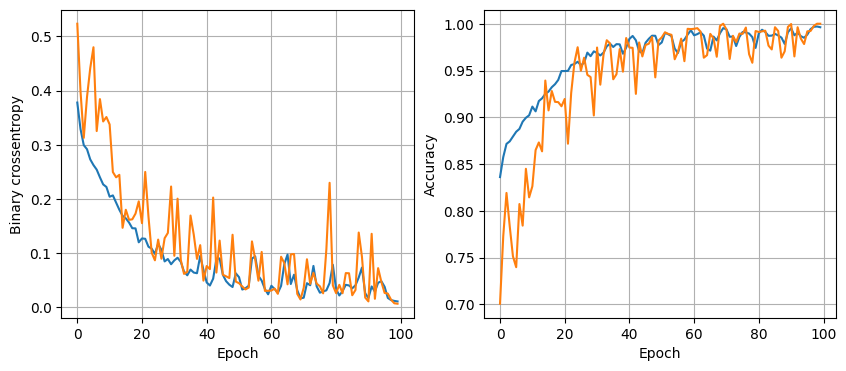

85/85 [==============================] - 0s 2ms/step - loss: 0.8072 - accuracy: 0.9326
64 nodes, dropout 0, lr 0.01, batch size 128


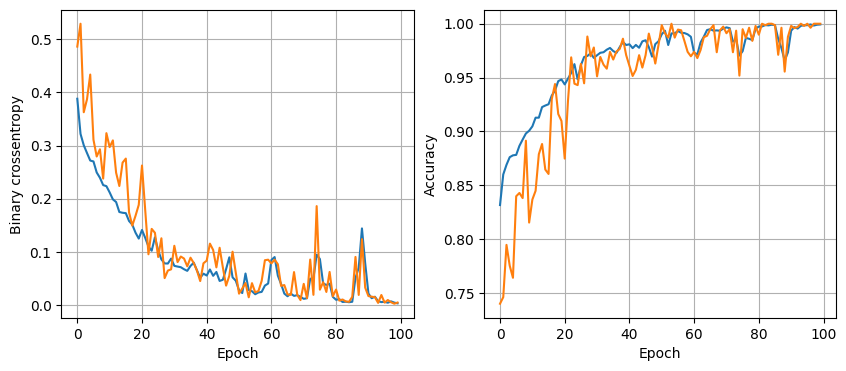

85/85 [==============================] - 0s 2ms/step - loss: 0.9271 - accuracy: 0.9253
64 nodes, dropout 0, lr 0.005, batch size 32


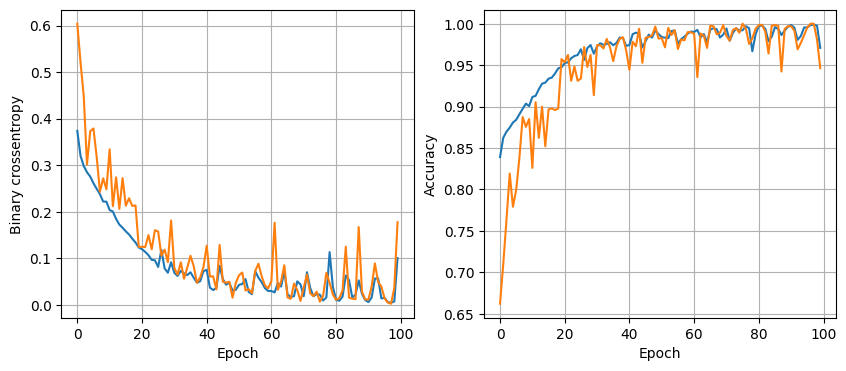

85/85 [==============================] - 0s 3ms/step - loss: 0.9394 - accuracy: 0.9300
64 nodes, dropout 0, lr 0.005, batch size 64


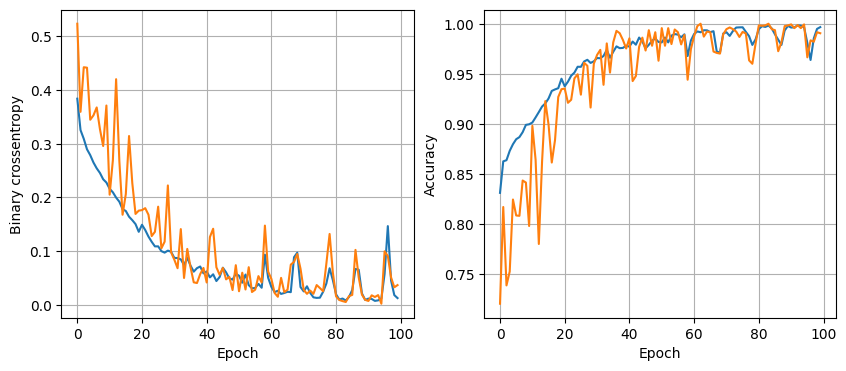

85/85 [==============================] - 0s 3ms/step - loss: 0.7550 - accuracy: 0.9337
64 nodes, dropout 0, lr 0.005, batch size 128


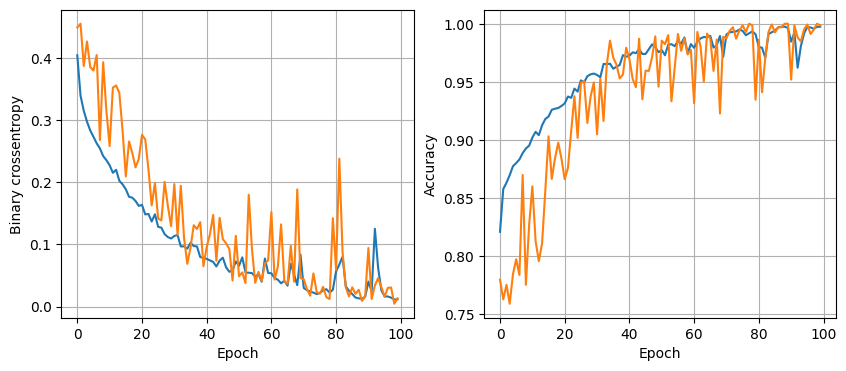

85/85 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.9227
64 nodes, dropout 0, lr 0.001, batch size 32


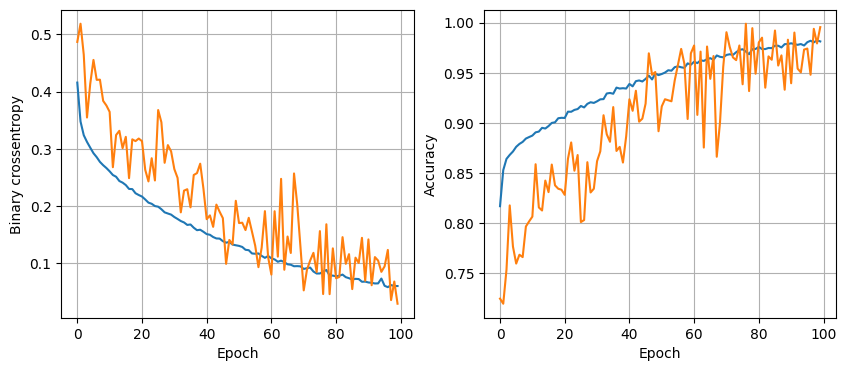

85/85 [==============================] - 0s 3ms/step - loss: 0.4703 - accuracy: 0.8973
64 nodes, dropout 0, lr 0.001, batch size 64


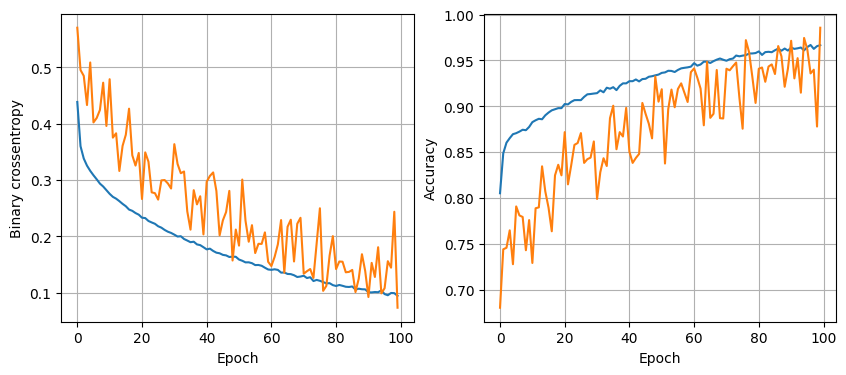

85/85 [==============================] - 0s 3ms/step - loss: 0.3503 - accuracy: 0.8973
64 nodes, dropout 0, lr 0.001, batch size 128


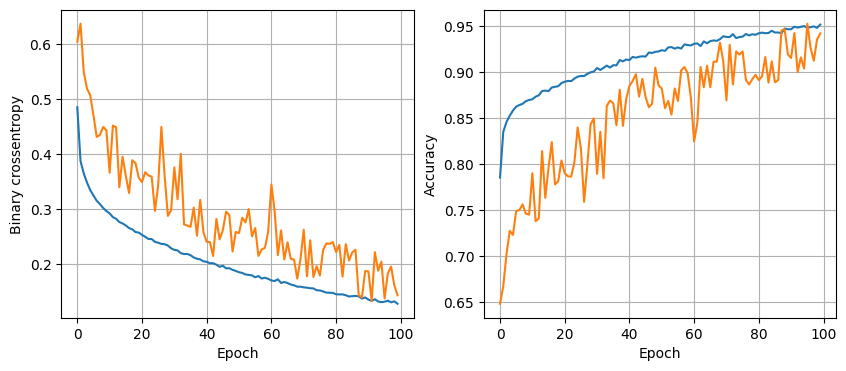

85/85 [==============================] - 0s 3ms/step - loss: 0.2831 - accuracy: 0.9131
64 nodes, dropout 0.2, lr 0.01, batch size 32


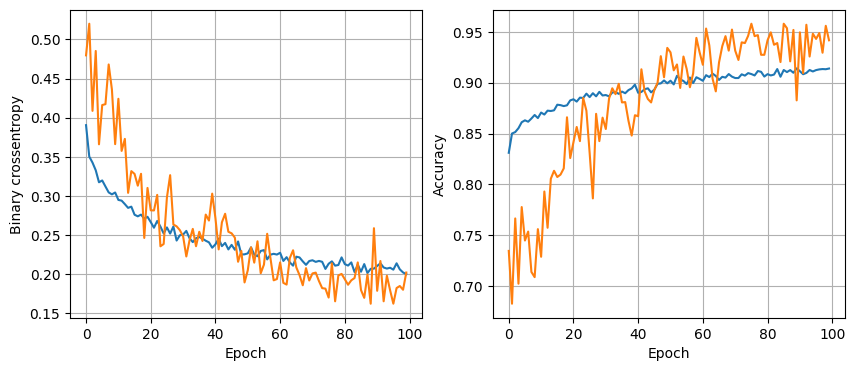

85/85 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 0.9127
64 nodes, dropout 0.2, lr 0.01, batch size 64


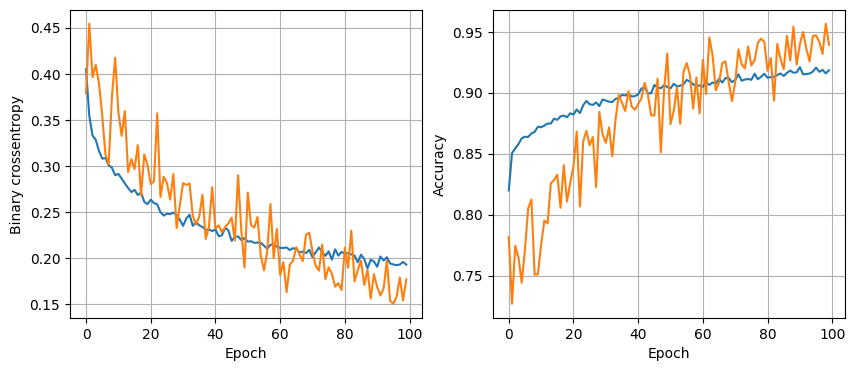

85/85 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.9142
64 nodes, dropout 0.2, lr 0.01, batch size 128


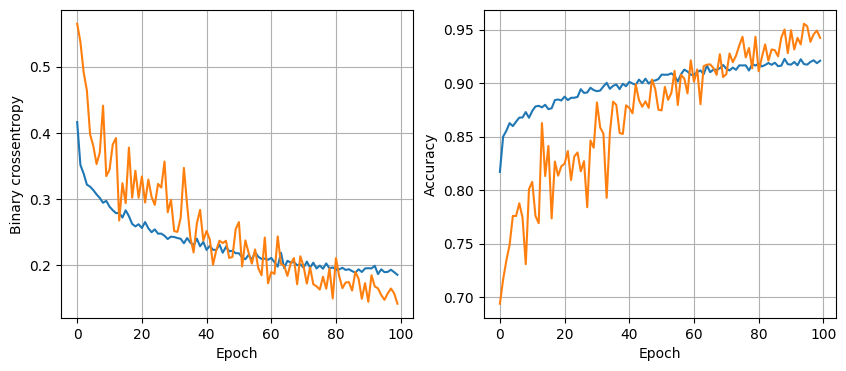

85/85 [==============================] - 0s 3ms/step - loss: 0.2539 - accuracy: 0.9116
64 nodes, dropout 0.2, lr 0.005, batch size 32


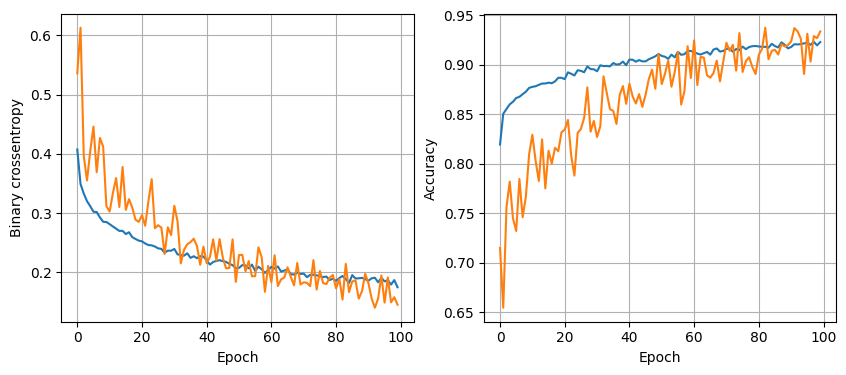

85/85 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.9264
64 nodes, dropout 0.2, lr 0.005, batch size 64


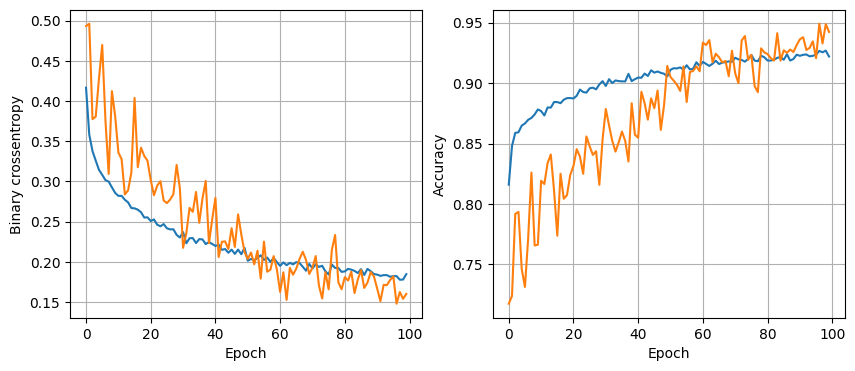

85/85 [==============================] - 0s 3ms/step - loss: 0.2250 - accuracy: 0.9249
64 nodes, dropout 0.2, lr 0.005, batch size 128


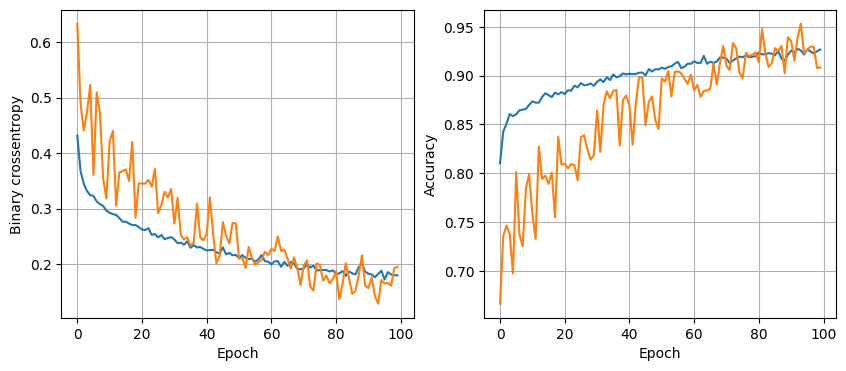

85/85 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.9341
64 nodes, dropout 0.2, lr 0.001, batch size 32


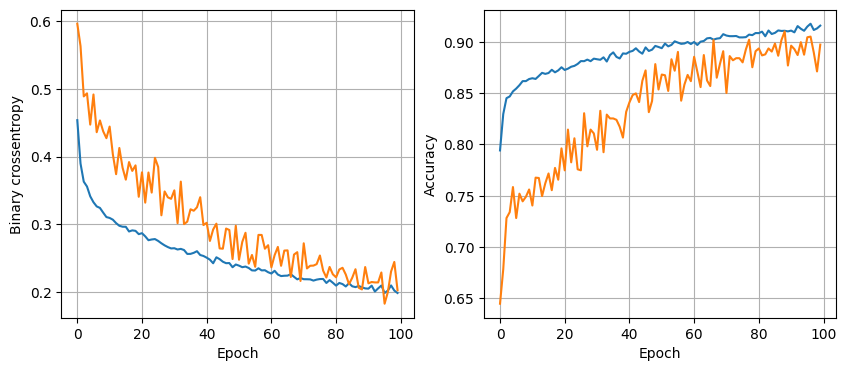

85/85 [==============================] - 0s 3ms/step - loss: 0.2214 - accuracy: 0.9264
64 nodes, dropout 0.2, lr 0.001, batch size 64


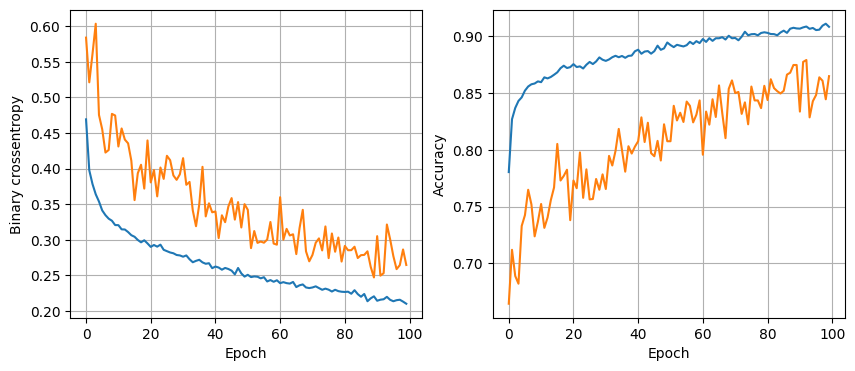

85/85 [==============================] - 0s 3ms/step - loss: 0.2036 - accuracy: 0.9297
64 nodes, dropout 0.2, lr 0.001, batch size 128


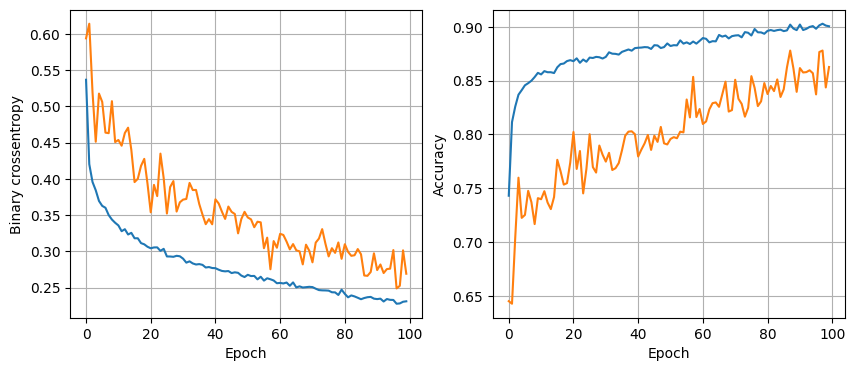

85/85 [==============================] - 0s 5ms/step - loss: 0.2154 - accuracy: 0.9238


In [65]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [66]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

85/85 [==============================] - 0s 3ms/step


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61       228
           1       0.97      0.95      0.96      2488

    accuracy                           0.93      2716
   macro avg       0.76      0.81      0.78      2716
weighted avg       0.93      0.93      0.93      2716

